In [1]:
import os
import h5py
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# PLOTTING OPTIONS
fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

from pycbc import conversions
from pycbc import detector
import time
from pycbc.inference import io, models
from pycbc.workflow import WorkflowConfigParser

In [4]:
from pyRing import pyRing
from pyRing import likelihood
from pyRing import noise

/work/yifan.wang/virtualenv/ringdown/lib/python3.7/site-packages/pyRing/utils.py:16: UserWarning: surfinBH is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.
  warnings.warn("surfinBH is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.")


In [5]:
input_par = {'data-H1': '', 
             'data-L1': '', 
             'data-V1': '', 
             'ignore-data-filename': 0, 
             'download-data': 1, 
             'datalen-download': 4096.0, 
             'gw-data-find': 0, 
             'gw-data-type-H1': '', 
             'gw-data-type-L1': '', 
             'gw-data-type-V1': '', 
             'tag': 'CLN', 
             'channel-H1': 'GWOSC', 
             'channel-L1': 'GWOSC', 
             'channel-V1': 'GWOSC', 
             'config-file': 'config_gw150914_production.ini', 
             'run-type': 'full', 
             'output': 'GW150914_PROD1_Kerr_221_0M', 
             'run-tag': 'PROD1', 
             'screen-output': 0, 
             'pesummary': 1, 
             'trigtime': 1126259462.423235, 
             'detectors': ['H1', 'L1'], 
             'ref-det': 'H1', 
             'sky-frame': 'equatorial', 
             'acf-H1': '', 
             'acf-L1': '', 
             'acf-V1': '', 
             'psd-H1': '', 
             'psd-L1': '', 
             'psd-V1': '', 
             'signal-chunksize': 4.0, 
             'noise-chunksize': 4.0, 
             'window-onsource': 0, 
             'window': 1, 
             'alpha-window': 0.1, 
             'sampling-rate': 4096.0, 
             'f-min-bp': 20.0, 
             'f-max-bp': 2038.0, 
             'bandpassing': 1, 
             'fft-acf': 1, 
             'acf-simple-norm': 1, 
             'no-lognorm': 0, 
             'truncate': 1, 
             'analysis-duration': 0.1, 
             'analysis-duration-n': 409, 
             'zero-noise': 0, 
             'gaussian-noise': '', 
             'gaussian-noise-seed': -1, 
             'gaussian-noise-white-sigma': 1e-21, 
             'chisquare-computation': 0, 
             'non-stationarity-check': 0, 
             'onsource-ACF': 0, 
             'noise-averaging-method': 'mean', 
             'Dirac-comb': 0, 
             'Zeroing-data': 0, 
             'maxent-psd': '', 
             'PSD-investigation': 0, 
             'injection-parameters': None, 
             'injection-approximant': '', 
             'inject-n-ds-modes': {'t': 1}, 
             'inject-area-quantization': 0, 
             'inject-charge': 0, 
             'injection-scaling': 1.0, 
             'injection-T': 64.0, 
             'template': 'Kerr', 
             'single-mode': None, 
             'n-ds-modes': {'t': 1}, 
             'ds-ordering': 'freq', 
             'kerr-modes': [(2, 2, 2, 0), (2, 2, 2, 1)], 
             'reference-amplitude': 1e-21, 
             'spheroidal': 0, 
             'qnm-fit': 1, 
             'coherent-n': 0, 
             'amp-non-prec-sym': 1, 
             'max-Kerr-amp-ratio': 0.0, 
             'TGR-overtones-ordering': 'Unordered', 
             'domega-tgr-modes': None, 
             'dtau-tgr-modes': None, 
             'area-quantization': 0, 
             'tau-AQ': 0, 
             'prior-reweight': 0, 
             'ParSpec': 0, 
             'ParSpec_Dmax_TGR': 2, 
             'ParSpec_Dmax_charge': 0, 
             'EsGB': 0, 
             'charge': 0, 
             'gr-time-prior': 1, 
             'dist-flat-prior': 0, 
             'ds-amp-flat-prior': 0, 
             'mf-time-prior': 67.92493161247017, 
             'nonref-det': 'L1'}

In [6]:
model = pyRing.KerrModel(modes=input_par['kerr-modes'],**input_par)


Trigtime in H1: 1126259462.423235


Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 2038.0] Hz.
Downsampling detector data from 16384.0 to 4096.0 Hz, decimate factor 4
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed. Estimating ACF.
Plancherel theorem E(f)/E(t) (expected value: 1) = 1.0663909875625166

Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 2038.0] Hz.
Downsampling detector data from 16384.0 to 4096.0 Hz, decimate factor 4
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed

# Load the PyRing run posteriors

In [7]:
evidence = pd.read_csv('/work/yifan.wang/ringdown/GW150914/pyring/reproduce/t6/221/GW150914_PROD1_Kerr_221_0M/Nested_sampler/Evidence.txt',sep='\t')

In [8]:
d221 = pd.read_csv('/work/yifan.wang/ringdown/GW150914/pyring//reproduce/t6/221/GW150914_PROD1_Kerr_221_0M/Nested_sampler/posterior.dat',sep=' ')
d221.columns = [d221.columns[(i+1)%len(d221.columns)] for i in range(len(d221.columns))]
d221.drop(columns='#',inplace=True)

In [9]:
par={}
for n in model.names:
    par[n] = d221[n].values[-1]
    
par

{'Mf': 74.9642816665504,
 'af': 0.7693909269973396,
 'A2220': 5.889900875719936,
 'A2221': 7.1526843406925416,
 'phi2220': 5.197892748005424,
 'phi2221': 1.5379702539900164}

In [10]:
model.log_likelihood(par)

38779.016128419025

In [11]:
snr = np.sqrt( 2* (model.log_likelihood(par)  - model.logZnoise))
print(snr)

10.488373760453015


# Likelihood

In [12]:
ra = model.fixed_params['ra']
dec = model.fixed_params['dec']
psi = model.fixed_params['psi']
t_start = model.fixed_params['t']

In [13]:
wf_model = model.get_waveform(par)

likelihood.loglikelihood(model,par,wf_model,
                        ra,dec,psi,t_start,
                        model.time_delay,
                        model.ref_det,
                        1,
                        409,
                        0,
                        0,
                        0)

38779.016128419025

# PSD or ACF

In [14]:
model.detectors['H1'].inverse_covariance

array([[ 3.55104532e+42, -1.73810334e+42,  4.00361590e+42, ...,
         8.72891314e+40, -3.99136564e+40,  1.26536177e+40],
       [-1.73810334e+42,  4.40173655e+42, -3.69758076e+42, ...,
        -1.17030834e+41,  9.25590822e+40, -3.99136564e+40],
       [ 4.00361590e+42, -3.69758076e+42,  8.91515323e+42, ...,
         1.55777695e+41, -1.17030834e+41,  8.72891313e+40],
       ...,
       [ 8.72891313e+40, -1.17030834e+41,  1.55777696e+41, ...,
         8.91515323e+42, -3.69758076e+42,  4.00361590e+42],
       [-3.99136564e+40,  9.25590822e+40, -1.17030834e+41, ...,
        -3.69758076e+42,  4.40173655e+42, -1.73810334e+42],
       [ 1.26536177e+40, -3.99136564e+40,  8.72891313e+40, ...,
         4.00361590e+42, -1.73810334e+42,  3.55104532e+42]])

In [15]:
model.detectors['H1'].inverse_covariance.shape

(409, 409)

In [16]:
d,cov,psd = noise.load_data('H1',None,**input_par)


Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 2038.0] Hz.
Downsampling detector data from 16384.0 to 4096.0 Hz, decimate factor 4
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed. Estimating ACF.
Plancherel theorem E(f)/E(t) (expected value: 1) = 1.0663909875625166


In [17]:
plt.plot(d)

In [18]:
len(d)

16384

In [19]:
f = np.linspace(20,2048,2000)

In [20]:
plt.plot(f,psd(f))
plt.xscale('log')
plt.yscale('log')

In [21]:
npath = '/work/yifan.wang/ringdown/GW150914/pyring/reproduce/t6/221/GW150914_PROD1_Kerr_221_0M/Noise'

In [22]:
psd_welch = np.loadtxt(npath+'/PSD_H1_1126257414_4096_4.0_4096.0.txt')

In [23]:
# load the posterior file
fp = io.loadfile('../extract.hdf', 'r')
# get the config, the data, and PSDs from the file
# the config file:
cp = fp.read_config_file()
# the data
data = fp.read_data()
# the psds
psds = fp.read_psds()

In [24]:
psds

{'H1': <pycbc.types.frequencyseries.FrequencySeries at 0x7f9e2ec37828>,
 'L1': <pycbc.types.frequencyseries.FrequencySeries at 0x7f9e2ec37978>}

In [25]:
plt.figure(figsize=[16,10])
plt.plot(psd_welch[:,0],psd_welch[:,1],label='psd welch from file',lw=3)
plt.plot(psd_welch[:,0],psd(psd_welch[:,0]),label='From PyRing Noise Object',ls='--')
plt.plot(psds['H1'].sample_frequencies,psds['H1'],label='From PyCBC')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.xlim(10,)
plt.xlabel('frequency / Hz')
plt.ylabel('PSD')

Text(0, 0.5, 'PSD')

# Zoom in

In [26]:
plt.figure(figsize=[16,10])
plt.plot(psd_welch[:,0],psd_welch[:,1],label='psd welch from file',lw=3)
plt.plot(psd_welch[:,0],psd(psd_welch[:,0]),label='From PyRing Noise Object',ls='--')
plt.plot(psds['H1'].sample_frequencies,psds['H1'],label='From PyCBC')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.xlim(100,1000)
plt.xlabel('frequency / Hz')
plt.ylabel('PSD')

Text(0, 0.5, 'PSD')

# Substitute the PSD to pycbc and compute the maxL parameter SNR

In [27]:
# load the posterior file
fp = io.loadfile('../extract.hdf', 'r')
# get the config, the data, and PSDs from the file
# the config file:
cp = fp.read_config_file()
# the data
data = fp.read_data()
# the psds
psds = fp.read_psds()

In [28]:
f = psds['H1'].sample_frequencies.data

In [29]:
h1_psd = psd(f)

In [30]:
np.savetxt('pyring_h1_psd.txt',np.transpose([f,h1_psd]))

In [31]:
_,_,psd_l1 = noise.load_data('L1',None,**input_par)


Reading data...

Using GWPY to download data.
Fetched 1 URLs from www.gw-openscience.org for [1126257414 .. 1126261510))
Reading data... [Done]

Loaded channel GWOSC starting at 1126257414.0 length 4096.0s.
Bandpassing the raw strain between [20.0, 2038.0] Hz.
Downsampling detector data from 16384.0 to 4096.0 Hz, decimate factor 4
Computing the one-sided PSD with the Welch method and the standard ACF for comparison.
No ACF was passed. Estimating ACF.
Plancherel theorem E(f)/E(t) (expected value: 1) = 1.0639531184225435


In [32]:
np.savetxt('pyring_l1_psd.txt',np.transpose([f,psd_l1(f)]))

# Explore ACF

In [38]:
acf_h1 = np.loadtxt('./GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_H1_1126257414_4096_4.0_4096.0.txt')
acf_l1 = np.loadtxt('./GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_L1_1126257414_4096_4.0_4096.0.txt')

In [39]:
acf_h1

array([[ 0.00000000e+00,  2.23375825e-40],
       [ 2.44140625e-04, -1.03337014e-41],
       [ 4.88281250e-04, -1.90475634e-40],
       ...,
       [ 3.99926758e+00,  6.66943291e-42],
       [ 3.99951172e+00, -1.90475634e-40],
       [ 3.99975586e+00, -1.03337014e-41]])

In [42]:
1 / (acf_h1[1,0] - acf_h1[0,0])

4096.0

Text(0.5, 1.0, 'H1 ACF')

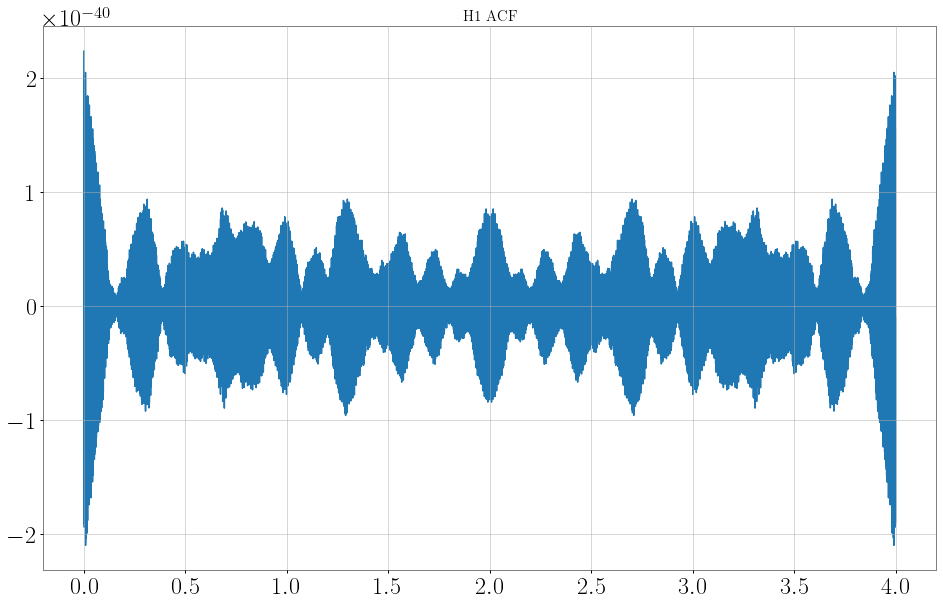

In [49]:
plt.figure(figsize=[16,10])
plt.plot(acf_h1[:,0],acf_h1[:,1])
#plt.legend()
plt.title('H1 ACF')

# Plot the 0.1s

Text(0.5, 1.0, 'H1 ACF')

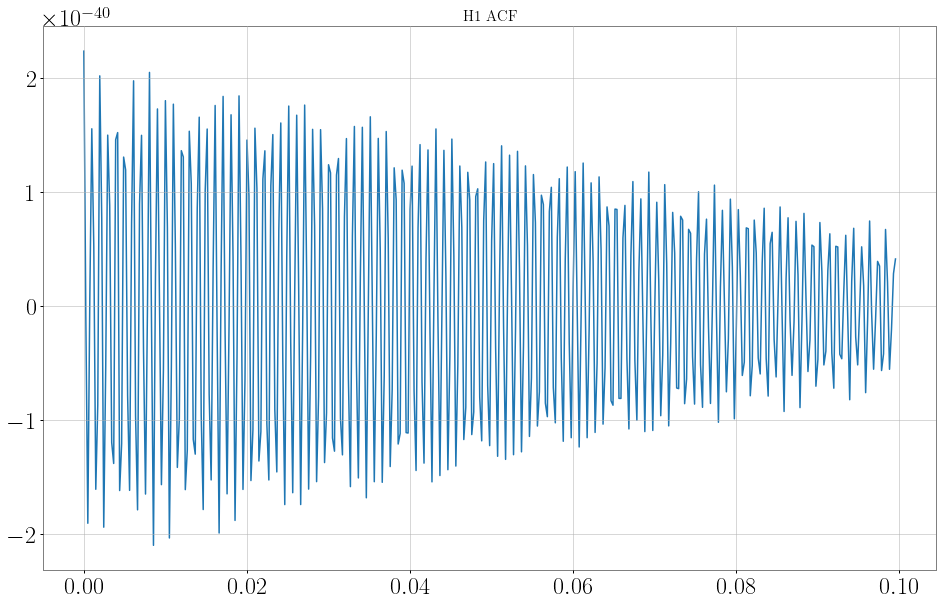

In [50]:
plt.figure(figsize=[16,10])
index = int(0.1 * 4096)
plt.plot(acf_h1[:index,0],acf_h1[:index,1])
#plt.legend()
plt.title('H1 ACF')

In [63]:
dt = acf_h1[1,0] - acf_h1[0,0]
srate = 1 / dt
chunk_size = 4
Npoints = int (srate * chunk_size)

#Fourier Transformation
freqs_default = np.fft.rfftfreq(Npoints, d=dt)
psd_acf_h1 = 2*np.real(np.fft.rfft(acf_h1[:,1]*dt))

In [64]:
freqs_default

array([0.00000e+00, 2.50000e-01, 5.00000e-01, ..., 2.04750e+03,
       2.04775e+03, 2.04800e+03])

In [65]:
psd_acf_h1

array([4.03172667e-50, 4.09195786e-50, 4.26565942e-50, ...,
       5.92647974e-51, 5.78159212e-51, 5.71116597e-51])

In [71]:
# load the posterior file
fp = io.loadfile('../extract.hdf', 'r')
# get the config, the data, and PSDs from the file
# the config file:
cp = fp.read_config_file()
# the data
data = fp.read_data()
# the psds
psds = fp.read_psds()

In [73]:
freqs_default

array([0.00000e+00, 2.50000e-01, 5.00000e-01, ..., 2.04750e+03,
       2.04775e+03, 2.04800e+03])

In [75]:
psds['H1'].sample_frequencies.data

array([0.0000000e+00, 6.2500000e-02, 1.2500000e-01, ...,
       2.0478750e+03, 2.0479375e+03, 2.0480000e+03])

In [79]:
pyringpsdh1 = interp1d(freqs_default, psd_acf_h1)

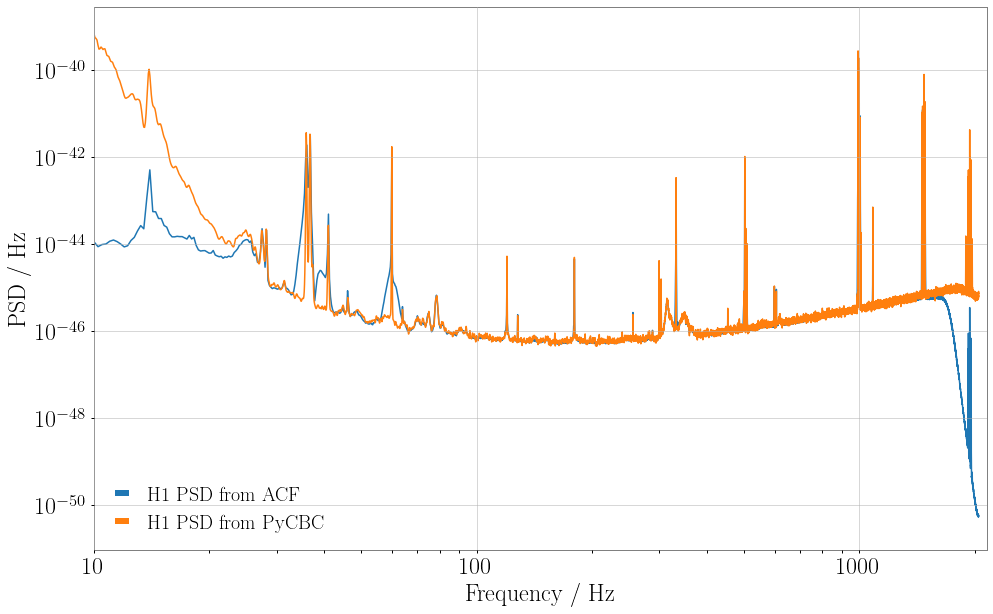

In [77]:
plt.figure(figsize=[16,10])
plt.plot(freqs_default,psd_acf_h1,label='H1 PSD from ACF')
plt.plot(psds['H1'].sample_frequencies,psds['H1'],label='H1 PSD from PyCBC')
plt.xlim(10,)
plt.xlabel('Frequency / Hz')
plt.ylabel('PSD / Hz')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

# Plot the difference

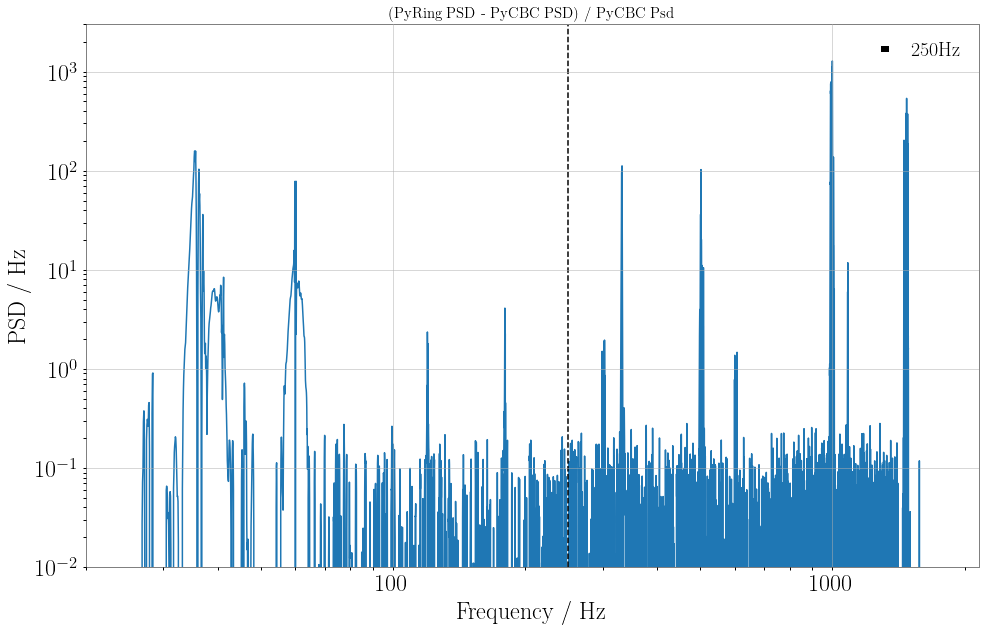

In [88]:
plt.figure(figsize=[16,10])
freqs = psds['H1'].sample_frequencies.data
plt.plot(freqs,(pyringpsdh1(freqs) - psds['H1'].data)/psds['H1'].data)
plt.xlim(10,)
plt.xlabel('Frequency / Hz')
plt.ylabel('PSD / Hz')
plt.xscale('log')
plt.yscale('log')

plt.axvline(x=250,color='black',ls='--',label='250Hz')
plt.title('(PyRing PSD - PyCBC PSD) / PyCBC Psd')
plt.ylim(1e-2,)
plt.xlim(20,)
plt.legend(loc='best')

In [97]:
def plot_diff(det='L1'):
    acf = np.loadtxt('./GW150914_PROD1_Kerr_221_0M/Noise/ACF_TD_'+str(det)+'_1126257414_4096_4.0_4096.0.txt')
    dt = acf[1,0] - acf[0,0]
    srate = 1 / dt
    chunk_size = 4
    Npoints = int (srate * chunk_size)

    #Fourier Transformation
    freqs_default = np.fft.rfftfreq(Npoints, d=dt)
    psd_acf = 2*np.real(np.fft.rfft(acf_h1[:,1]*dt))
    
    # load the PyCBC posterior file
    fp = io.loadfile('../extract.hdf', 'r')
    cbcpsds = fp.read_psds()
    
    plt.figure(figsize=[16,10])
    plt.plot(freqs_default,psd_acf,label='PyRing '+str(det)+' PSD from ACF')
    plt.plot(psds[det].sample_frequencies,psds[det],label='PyCBC '+str(det)+' PSD')
    plt.xlim(10,)
    plt.xlabel('Frequency / Hz')
    plt.ylabel('PSD / Hz')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='best')
    plt.title(det)
    
    pyringpsd_interp = interp1d(freqs_default, psd_acf)
    
    plt.figure(figsize=[16,10])
    freqs = psds[det].sample_frequencies.data
    plt.plot(freqs,(pyringpsd_interp(freqs) - psds[det].data)/psds[det].data)
    plt.xlabel('Frequency / Hz')
    plt.ylabel('PSD / Hz')
    plt.xscale('log')
    plt.yscale('log')
    plt.axvline(x=250,color='black',ls='--',label='250Hz')
    plt.title('(PyRing PSD - PyCBC PSD) / PyCBC Psd')
    plt.ylim(1e-2,)
    plt.xlim(240,260)
    plt.legend(loc='best')

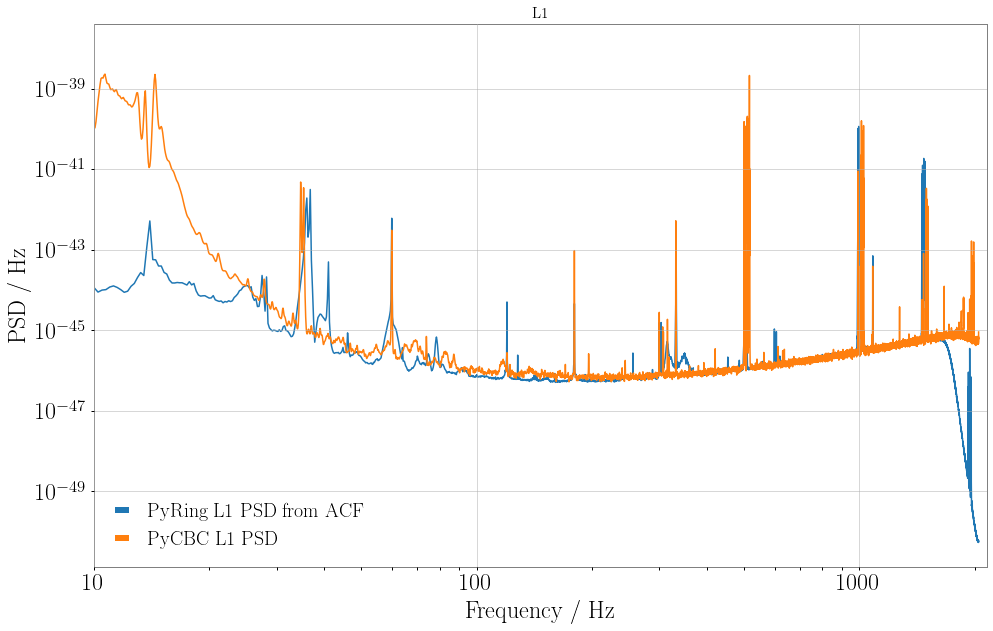

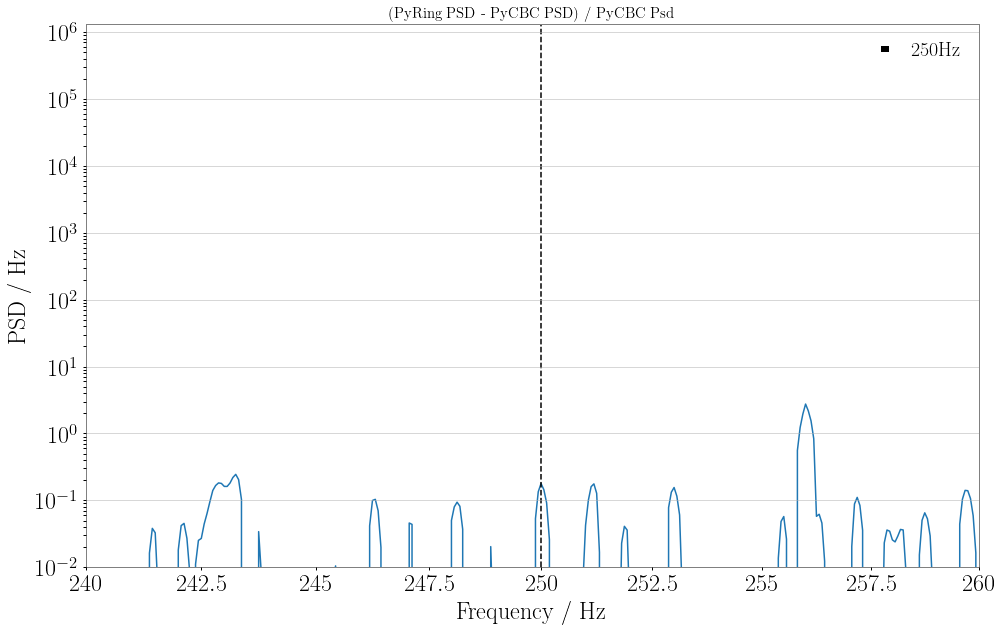

In [98]:
plot_diff('L1')

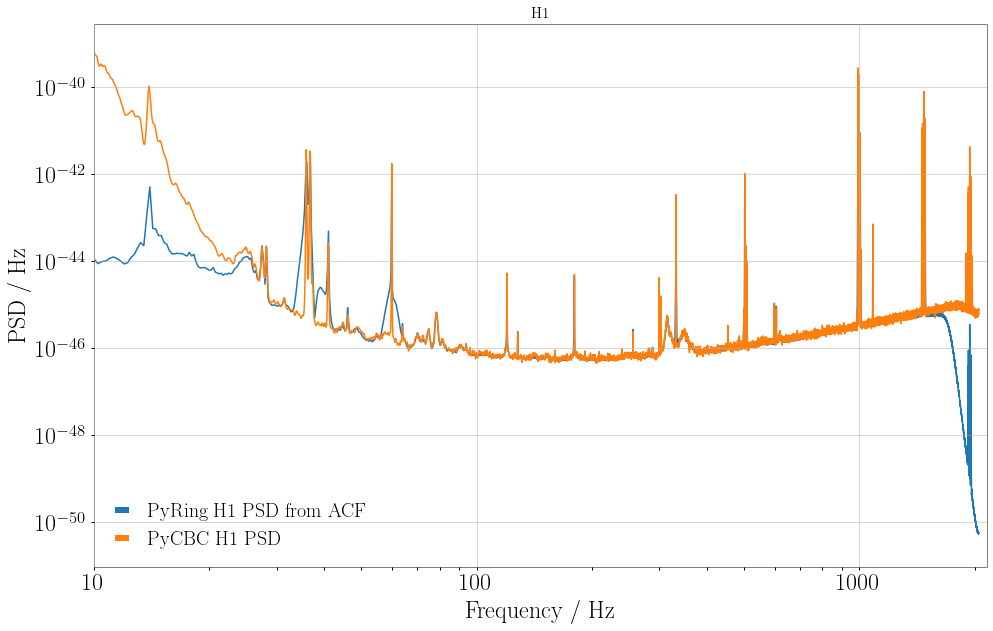

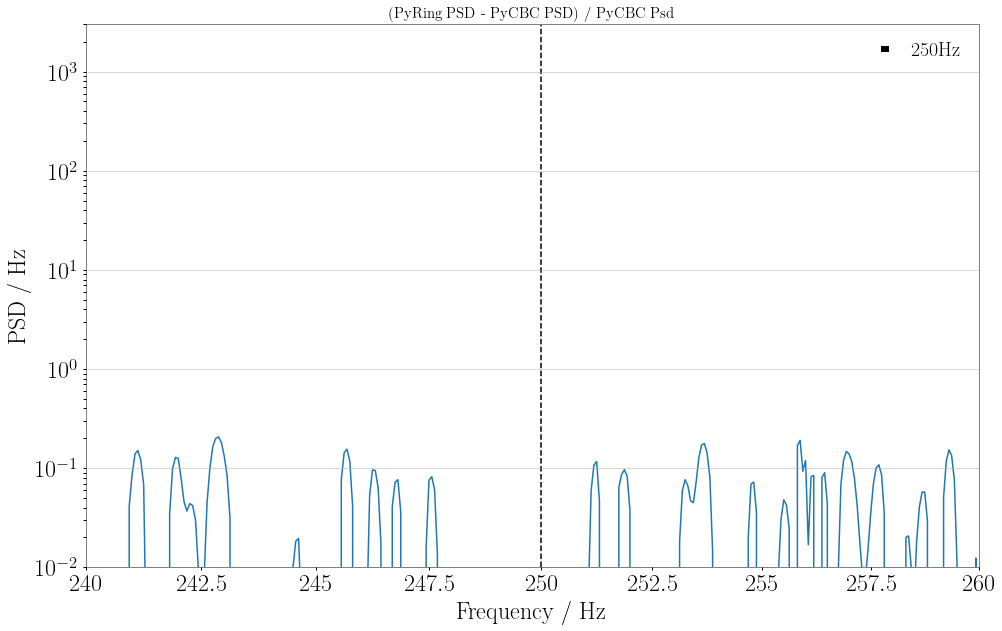

In [99]:
plot_diff('H1')

# PyCBC with Pyring PSD

In [33]:
#using the pyring psd
cp = WorkflowConfigParser(['./inference-GW150914_095045.ini'])
model = models.read_from_config(cp)

In [34]:
params = {'final_mass':d221['Mf'].values[-1],
         'final_spin':d221['af'].values[-1],
         'amp220':d221['A2220'].values[-1]*1e-21,
         'phi220':d221['phi2220'].values[-1],
         'absamp221':d221['A2221'].values[-1]*1e-21,
         'phi221':d221['phi2221'].values[-1]}

In [35]:
model.update(**params)
model.loglikelihood

-70884062.96232878

In [36]:
# get the matched-filter SNR
print((2*model.loglr)**0.5)

(6.402287264501941e-15+104.55728572449563j)


In [37]:
cp2 = WorkflowConfigParser(['./pycbc-inference-low10.ini'])
model2 = models.read_from_config(cp2)

KeyboardInterrupt: 

In [ ]:
model2.update(**params)
model2.loglikelihood

In [ ]:
# get the matched-filter SNR
print((2*model2.loglr)**0.5)

In [ ]:
model2.psds

In [ ]:
a = np.loadtxt('./pyring_h1_psd.txt')
b = np.loadtxt('./pyring_l1_psd.txt')
plt.plot(model2.psds['H1'].sample_frequencies,model2.psds['H1'],label='PyCBC H1')
#plt.plot(model2.psds['L1'].sample_frequencies,model2.psds['L1'],label='PyCBC L1')
plt.plot(a[:,0],a[:,1],label='PyRing H1')
#plt.plot(b[:,0],b[:,1],label='PyRing L1')
plt.xscale('log')
plt.yscale('log')
plt.xlim(250,300)
plt.legend(loc='best')

In [ ]:
#plt.plot(model2.psds['H1'].sample_frequencies,model2.psds['H1'],label='PyCBC H1')
plt.plot(model2.psds['L1'].sample_frequencies,model2.psds['L1'],label='PyCBC L1')
#plt.plot(a[:,0],a[:,1],label='PyRing H1')
plt.plot(b[:,0],b[:,1],label='PyRing L1')
plt.xscale('log')
plt.yscale('log')
plt.xlim(200,300)
plt.ylim(1e-47,1e-45)
plt.legend(loc='best')